In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("/content/drive/MyDrive/DIS.csv")
print("Number of rows and columns:", df.shape)
df.head(5)

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,4/26/2016,104.580002,105.570000,104.180000,104.889999,98.957764,6452900
1,4/27/2016,105.190002,105.599998,104.760002,105.279999,99.325691,5996100
2,4/28/2016,104.540001,105.489998,103.800003,104.029999,98.146393,5658300
3,4/29/2016,103.949997,104.209999,102.400002,103.260002,97.419945,7006900
4,5/2/2016,103.300003,104.570000,102.800003,104.360001,98.457741,5285700


In [2]:

#split the data into training and test sets to avoid overfitting and to be able to investigate the generalization ability of our model.
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [3]:

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [4]:

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 9s 112ms/step - loss: 0.0560
Epoch 2/100
24/24 [==============================] - 3s 119ms/step - loss: 0.0086
Epoch 3/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0100
Epoch 4/100
24/24 [==============================] - 3s 122ms/step - loss: 0.0058
Epoch 5/100
24/24 [==============================] - 3s 122ms/step - loss: 0.0068
Epoch 6/100
24/24 [==============================] - 3s 121ms/step - loss: 0.0071
Epoch 7/100
24/24 [==============================] - 3s 119ms/step - loss: 0.0059
Epoch 8/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0069
Epoch 9/100
24/24 [==============================] - 3s 119ms/step - loss: 0.0057
Epoch 10/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0051
Epoch 11/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0048
Epoch 12/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0047
Epoch 13/100


In [5]:

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [7]:

#Make Predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [8]:
print(predicted_stock_price.shape)

(459, 1)


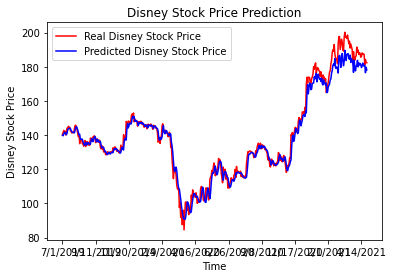

In [10]:

# Visualising the results
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red", label = "Real Disney Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Disney Stock Price")
plt.xticks(np.arange(0,459,50))
plt.title('Disney Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Disney Stock Price')
plt.legend()
plt.show()